# 3.5

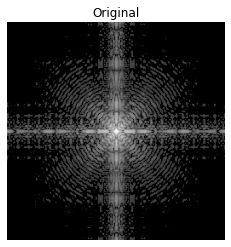

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


A = cv2.imread("Fig3.05(a).jpg")
A = np.mean(A, -1)

for i in range (len(A)):
  for j in range (len(A[0])):
    A[i][j] = np.log (1 + A[i][j])

maxVal = np.max(A)

for i in range (len(A)):
  for j in range (len(A[0])) :
    A[i][j] = (A[i][j] / maxVal)

fig, axs = plt.subplots(1 , 1)

axs.imshow (A, cmap = "gray")
axs.set_title ("Original")
axs.axis ("off")

plt.show()

fig.savefig("imagensProduzidas/Fig3.5.jpg")

# 3.8

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

A = cv2.imread('images/Fig3.08(a).jpg', 0)
A = A.astype(np.int32)
B = 255*A
C = 255*A
D = 255*A

# B
for i in range(len(B)):
    for j in range(len(B[0])):
        B[i][j] = (B[i][j])**0.6

# C

for i in range(len(C)):
    for j in range(len(C[0])):
        C[i][j] = (C[i][j])**0.4

# D

for i in range(len(D)):
    for j in range(len(D[0])):
        D[i][j] = (D[i][j])**0.3


fig, axs = plt.subplots(2, 2)

axs[0, 0].imshow(A, cmap='gray')
axs[0, 0].set_title('Original')
axs[0, 0].axis('off')

axs[0, 1].imshow(B, cmap='gray')
axs[0, 1].set_title('γ = 0.6')
axs[0, 1].axis('off')

axs[1, 0].imshow(C, cmap='gray')
axs[1, 0].set_title('γ = 0.4 ')
axs[1, 0].axis('off')

axs[1, 1].imshow(D, cmap='gray')
axs[1, 1].set_title('γ = 0.3')
axs[1, 1].axis('off')

plt.show()

fig.savefig('geradas/Fig3.8.jpg')

# 3.10

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Funcao de alargamento
# pontos: (96,32) , (160, 224)
def alarg(pixel):
    if pixel <= 96:
        y = pixel/3
    elif 96 < pixel < 160:
        y = 3*pixel - 256
    else:
        y = (pixel+512)/3
    return y


x = np.arange(0, 256)
A = x.astype(float)
B = cv2.imread('images/Fig3.10(b).jpg')
C = np.mean(B, -1)
D = np.mean(B, -1)


# A

for i in range(len(A)):
    A[i] = alarg(x[i])


# C

for i in range(len(C)):
    for j in range(len(C[0])):
        C[i][j] = alarg(C[i][j])


# D

for i in range(len(D)):
    for j in range(len(D[0])):
        if D[i][j] <= 110:
            D[i][j] = 0
        else:
            D[i][j] = 255


fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(x, A)
axs[0, 0].set_title('Funcao de alargamento')

axs[0, 1].imshow(B, cmap='gray')
axs[0, 1].set_title('Imagem com baixo contraste')
axs[0, 1].axis('off')

axs[1, 0].imshow(C, cmap='gray')
axs[1, 0].set_title('Imagem com alargamento')
axs[1, 0].axis('off')

axs[1, 1].imshow(D, cmap='gray')
axs[1, 1].set_title('Imagem limiarizada')
axs[1, 1].axis('off')

plt.show()

fig.savefig('geradas/Fig3.10.jpg')

# 3.12

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


A = cv2.imread('images/Fig3.12.jpg')
B = np.mean(A, -1)
C = np.mean(A, -1)


# B

for i in range(len(B)):
    for j in range(len(B[0])):
        if 165 < B[i][j] < 256:
            B[i][j] = 230
        else:
            B[i][j] = 30


# C

for i in range(len(C)):
    for j in range(len(C[0])):
        if 80 < C[i][j] < 160:
            C[i][j] = 20


fig, axs = plt.subplots(1, 3)

axs[0].imshow(A, cmap='gray')
axs[0].set_title('Original')
axs[0].axis('off')

axs[1].imshow(B, cmap='gray')
axs[1].set_title('Transform 3.11(a)\n (165, 256)')
axs[1].axis('off')

axs[2].imshow(C, cmap='gray')
axs[2].set_title('Transform 3.11(b)\n (80, 160)')
axs[2].axis('off')

plt.show()

fig.savefig('geradas/Fig3.12.jpg')

# 3.14

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


A = cv2.imread('images/Fig3.14.jpg', 0)
Pbits = []

for i in range(8):
    Pbits.append(np.zeros((len(A), len(A[0])), dtype=np.uint8))

for i in range(len(A)):
    for j in range(len(A[0])):
        pixel = np.binary_repr(A[i][j], width=8)
        pixel = pixel
        for k in range(8):
            mat = Pbits[7-k]
            if int(pixel[k]) == 1:
                mat[i][j] = 2**(7-k)
            else:
                mat[i][j] = 0
            Pbits[7-k] = mat


fig, axs = plt.subplots(3, 3)

axs[0, 0].imshow(A, cmap='gray')
axs[0, 0].set_title('Original')
axs[0, 0].axis('off')

axs[0, 1].imshow(Pbits[0], cmap='gray')
axs[0, 1].set_title('1º plano')
axs[0, 1].axis('off')

axs[0, 2].imshow(Pbits[1], cmap='gray')
axs[0, 2].set_title('2º plano')
axs[0, 2].axis('off')

axs[1, 0].imshow(Pbits[2], cmap='gray')
axs[1, 0].set_title('3º plano')
axs[1, 0].axis('off')

axs[1, 1].imshow(Pbits[3], cmap='gray')
axs[1, 1].set_title('4º plano')
axs[1, 1].axis('off')

axs[1, 2].imshow(Pbits[4], cmap='gray')
axs[1, 2].set_title('5º plano')
axs[1, 2].axis('off')

axs[2, 0].imshow(Pbits[5], cmap='gray')
axs[2, 0].set_title('6º plano')
axs[2, 0].axis('off')

axs[2, 1].imshow(Pbits[6], cmap='gray')
axs[2, 1].set_title('7º plano')
axs[2, 1].axis('off')

axs[2, 2].imshow(Pbits[7], cmap='gray')
axs[2, 2].set_title('8º plano')
axs[2, 2].axis('off')
plt.show()

fig.savefig('geradas/Fig3.14.jpg')

# 3.20

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def histogram(img, L=256):

    #guardar a soma da qtdd dos pixels em um vetor
    pixels = np.zeros(L, dtype=float)
    pixels[0] = (img == 0).sum()
    for i in range(1, L):
        pixels[i] = (img == i).sum() + pixels[i-1]
    #equcao do mapeamento
    pixels = ((L - 1) * pixels) // (len(img) * len(img[0]))

    #refazer a imagem alterando os valores dos pixels
    for i in range(len(img)):
        for j in range(len(img[0])):
            pos = int(img[i][j])
            img[i][j] = pixels[pos]

    probabs = np.zeros(len(pixels), dtype=float)
    values = []
    for i in range(L):
        probabs[i] = (img == i).sum() / (len(img) * len(img[0]))
        values.append(np.linspace(0, probabs[i], 256))

    return img, values

A = cv2.imread('images/Fig3.15a.jpg')

B = cv2.imread('images/Fig3.15b.jpg')

C = cv2.imread('images/Fig3.15c.jpg')

D = cv2.imread('images/Fig3.15d.jpg')


fig, axs = plt.subplots(4, 3)
fig.set_size_inches(25, 20)


axs[0, 0].imshow(A, cmap='gray')
axs[0, 0].set_title('Original')
axs[0, 0].axis('off')

A = np.mean(A, -1)
axs[0, 1].imshow(histogram(A)[0], cmap='gray')
axs[0, 1].set_title('Imagens equalizadas')
axs[0, 1].axis('off')

axs[0, 2].plot(np.arange(256), histogram(A)[1], color="black", linewidth=0.3)
axs[0, 2].set_title('Histograma das imagens centrais')


axs[1, 0].imshow(B, cmap='gray')
axs[1, 0].axis('off')

B = np.mean(B, -1)
axs[1, 1].imshow(histogram(B)[0], cmap='gray')
axs[1, 1].axis('off')

axs[1, 2].plot(np.arange(256), histogram(B)[1], color="black", linewidth=0.3)

axs[2, 0].imshow(C, cmap='gray')
axs[2, 0].axis('off')

C = np.mean(C, -1)
axs[2, 1].imshow(histogram(C)[0], cmap='gray')
axs[2, 1].axis('off')

axs[2, 2].plot(np.arange(256), histogram(C)[1], color="black", linewidth=0.3)

axs[3, 0].imshow(D, cmap='gray')
axs[3, 0].axis('off')

D = np.mean(D, -1)
axs[3, 1].imshow(histogram(D)[0], cmap='gray')
axs[3, 1].axis('off')

axs[3, 2].plot(np.arange(256), histogram(D)[1], color='black', linewidth=0.3)

plt.show()

fig.savefig('geradas/Fig3.20.jpg')

# 3.25

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def graph1():
    values = []
    for i in range(10):
        values.append(7/10*i)
    for i in range(10, 20):
        values.append(-0.6*i + 13)
    for i in range(20, 180):
        values.append(-i/160 + 9/8)
    for i in range(180, 205):
        values.append(i/25 - 36/5)
    for i in range(205, 256):
        values.append(-i/50 + 51/10)

    return values


def graphs2():
    values1 = []
    for i in range(20):
        values1.append(np.log(1 + 6.525 * i) / np.log(1.046) + 1.1 * i)
    for i in range(20, 200):
        values1.append(np.log(1 - 0.005 * i) / np.log(2) + 0.6 * i + 117.16)
    for i in range(200, 256):
        values1.append(np.log(1 - 0.003 * i) / np.log(2) + 0.5 * i + 132)

    values2 = []
    for i in range(120):
        values2.append(1.11 ** i / 10000 + 0.2 * i)
    for i in range(120, 210):
        values2.append(1.065 ** i / 20000 + 1.281 * i - 105)
    for i in range(210, 256):
        values2.append(np.exp(0.02*(i-70)) + 0.91 * i - 17.6)

    return values1, values2


def remap(img, remappixel):
    img = img.astype(np.int16)

    for i in range(len(img)):
        for j in range(len(img[0])):
            img[i][j] = int(remappixel[img[i][j]])
            if img[i][j] <= 80:
                img[i][j] += 50


    pixvalues = []
    for i in range(256):
        pixvalues.append(np.linspace(0, (img == i).sum(), 256))

    return img, pixvalues


A = cv2.imread('images/Fig3.25.jpg')
A = np.mean(A, -1)

fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(np.arange(0, 256), graph1(), color='black')
axs[0, 0].set_xlabel('Intensidade')
axs[0, 0].set_ylabel('Numero de pixels(x 10^4)')
axs[0, 0].set_title('Histograma especificado')

axs[0, 1].plot(np.arange(0, 256), graphs2()[0], graphs2()[1], '--')
axs[0, 1].set_xlabel('Intensidade de entrada')
axs[0, 1].set_ylabel('Intensidade de saida')
axs[0, 1].legend(['1', '2'])
axs[0, 1].set_title('Transformacoes')


axs[1, 0].imshow(remap(A, graphs2()[0])[0], cmap='gray')
axs[1, 0].set_title('Imagem remapeada', loc='left', y=0.9, fontdict={'color': 'red', 'fontsize': '8'})
axs[1, 0].axis('off')

axs[1, 1].plot(np.arange(0, 256), remap(A, graphs2()[0])[1], color='gray')
axs[1, 1].set_xlabel('Intensidade')
axs[1, 1].set_ylabel('Numero de pixels')
axs[1, 1].set_title('Histograma da imagem remapeada')
plt.tight_layout()

plt.show()

fig.savefig('geradas/Fig3.25.jpg')

# 3.26

# 3.27

# 3.33

# 3.34

# 3.35

# 3.38

# 3.40

# 3.42

# 3.43